## Performing Machine Learning Tasks in Tensorflow
This Lesson will serve as a brief introduction to using Keras, a higher-level Machine Learning Tool which uses Tensorflow in the backend. This should be useful as supplementary material to students who are interested in using Neural Network models in projects or in their careers.

### Install Keras/Tensorflow

In [1]:
pip install tensorflow

After installing tensorflow, you should be able to use the Keras API, a common interface for people with general python experience but less experience creating/training Neural Network models  

In [5]:
import tensorflow as tf
import tensorflow.keras as ker
import numpy as np

### Objective 2: Classical Mnist Number Example (Regression)

We are importing a dataset that is very commonly used to demonstrate the power and simplicity of neural network models. The x data refers to individual pixel colors. From an 8x8 image, there are 64 input values. The y value, sometimes called target or label, refers to the ground truth digit value of the image.  

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()
print("Digits data shape: {}".format(digits.data.shape))
print("Digits output shape: {}".format(digits.target.shape))
X_full = np.array(digits.data)
y_full = np.array(digits.target)

Digits data shape: (1797, 64)
Digits output shape: (1797,)


We can visualize this data with a simple plot. Here we can clearly see this image corresponds to a 4.

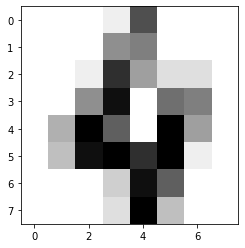

In [4]:
import matplotlib.pyplot as plt

def show_image(digit_data, n, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    img = digit_data[n].reshape(8,8)
    ax.imshow(img,cmap='binary')
    
n = 4
show_image(X_full, n)

We will split up our data set into training and testing sets.

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_full, y_full,
                                                 test_size=0.15)

Next, we will instantiate the Sequential model from Keras. Some important features of the model we should consider:
1) Input Dimension of the Dataset: can declare in the first hidden layer. (Our data-set has 64 input variables)

2) Hidden Layer Type: Dense is simplest denoting fully connected hidden layer. There are a ton of other predefined layer types that are useful in different applications. Essentially, the layer is just applying a mathematical operation to its inputs. (Other examples of layer types include: pooling layer, convolutional layer, recurrent layers that may be suitable for different types of data/applications. We won't discuss these in this course, but you're welcome to look them up in case they are useful for your data).

3) Number of Nodes: this is the first input for Dense layer. How wide do we want our hidden layers to be? For this example we will use 2 hidden layers with 100 nodes each.

In [95]:
NNmodel = tf.keras.Sequential()
# model object created, now we add hidden layers
# sequentially
NNmodel.add(tf.keras.layers.Dense(100,input_dim=64,
                                  activation="tanh"))
#2 layers, 100 nodes each, with tanh activation fxn
NNmodel.add(tf.keras.layers.Dense(100,activation="tanh"))
#Output layer is single value- model prediction
NNmodel.add(tf.keras.layers.Dense(1))
#Print model summary
NNmodel.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 16,701
Trainable params: 16,701
Non-trainable params: 0
_________________________________________________________________


The next step is to "compile" the model. Important options to consider here:

1) Loss function: how do we assess model performance? For most regression tasks, Mean-squared Error (MSE) is used. For classification tasks, cross-entropy loss functions are commonly used. Both will be demonstrated. Examples of other loss functions include mean-absolute error, hinge, poisson.

2) Optimization algorithm: deep NNs trained with large datasets


3) Learning rate: for stochastic optimizers such as SGD, ADAM, the learning rate is an important hyperparameter that usually needs to be adjusted.

In [106]:
#compiling our model presets like MSE and ADAM
NNmodel.compile(loss='MSE',optimizer='Adam')

#can define custom optimizers or loss functions
cust_opt=keras.optimizers.Adam(learning_rate = 0.001)
NNmodel.compile(loss='MSE',optimizer=cust_opt)

Now everything is set-up. Let's train the model.

1) Epochs- this refers to how many times the training algorithm will recycle over all of the training data. Another common hyperparameter that can be adjusted to balance under/over-fitting to training data

2) Batch Size: refers to the number of training points presented to the model at one time. For small data-sets, one can use the full batch, but for many data-points this becomes computationally inefficient. Can be left unspecified.

3) Validation data (optional)- this allows for you to see how the model performs on validation data over course of training

In [107]:
NNmodel.fit(X_train,y_train,epochs=500,batch_size=48,validation_data = (X_test, y_test))

Epoch 1/500
32/32 [==============================] - 0s 6ms/step - loss: 0.0070 - val_loss: 0.3161
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.2698
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.2586
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.2887
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.2573
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 7.0523e-04 - val_loss: 0.2615
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 5.0309e-04 - val_loss: 0.2522
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 4.9258e-04 - val_loss: 0.2655
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 4.0266e-04 - val_loss: 0.2500
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 3.3131e-04 - val_lo

32/32 [==============================] - 0s 2ms/step - loss: 6.6543e-04 - val_loss: 0.2675
Epoch 81/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.3772
Epoch 82/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1121 - val_loss: 0.4379
Epoch 83/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0826 - val_loss: 0.3432
Epoch 84/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0439 - val_loss: 0.4815
Epoch 85/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.3186
Epoch 86/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.3163
Epoch 87/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.3006
Epoch 88/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.3064
Epoch 89/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.2988
Epoch 90/

32/32 [==============================] - 0s 2ms/step - loss: 8.0165e-05 - val_loss: 0.2776
Epoch 237/500
32/32 [==============================] - 0s 2ms/step - loss: 6.2308e-05 - val_loss: 0.2838
Epoch 238/500
32/32 [==============================] - 0s 2ms/step - loss: 5.3900e-05 - val_loss: 0.2818
Epoch 239/500
32/32 [==============================] - 0s 2ms/step - loss: 4.8267e-05 - val_loss: 0.2786
Epoch 240/500
32/32 [==============================] - 0s 2ms/step - loss: 4.6174e-05 - val_loss: 0.2816
Epoch 241/500
32/32 [==============================] - 0s 2ms/step - loss: 4.5595e-05 - val_loss: 0.2807
Epoch 242/500
32/32 [==============================] - 0s 2ms/step - loss: 5.8270e-05 - val_loss: 0.2819
Epoch 243/500
32/32 [==============================] - 0s 2ms/step - loss: 7.2982e-05 - val_loss: 0.2788
Epoch 244/500
32/32 [==============================] - 0s 2ms/step - loss: 6.3966e-05 - val_loss: 0.2815
Epoch 245/500
32/32 [==============================] - 0s 2ms/step - 

32/32 [==============================] - 0s 2ms/step - loss: 6.8835e-05 - val_loss: 0.2583
Epoch 393/500
32/32 [==============================] - 0s 2ms/step - loss: 5.7563e-05 - val_loss: 0.2576
Epoch 394/500
32/32 [==============================] - 0s 2ms/step - loss: 5.8273e-05 - val_loss: 0.2569
Epoch 395/500
32/32 [==============================] - 0s 2ms/step - loss: 7.9718e-05 - val_loss: 0.2615
Epoch 396/500
32/32 [==============================] - 0s 2ms/step - loss: 5.8251e-05 - val_loss: 0.2600
Epoch 397/500
32/32 [==============================] - 0s 2ms/step - loss: 5.7344e-05 - val_loss: 0.2583
Epoch 398/500
32/32 [==============================] - 0s 2ms/step - loss: 4.6984e-05 - val_loss: 0.2610
Epoch 399/500
32/32 [==============================] - 0s 2ms/step - loss: 4.1062e-05 - val_loss: 0.2590
Epoch 400/500
32/32 [==============================] - 0s 2ms/step - loss: 3.7731e-05 - val_loss: 0.2608
Epoch 401/500
32/32 [==============================] - 0s 2ms/step - 

Using the trained model, we can predict on test points and see how well it does.

In [104]:
ypred=NNmodel.predict(X_test[0:10])
print(ypred.reshape(-1))
print(y_test[0:10])

[1.2969667 2.9876807 2.9971516 2.0185177 3.021854  5.9824133 4.987434
 4.677704  3.0574777 1.9278396]
[1 3 3 2 3 6 5 4 3 2]


### Objective 3: Monitoring Training, Hyperparameter Optimization, Saving a Trained Model

A simple way to know when to stop training models, is by looking at the error of validation data. If there is a minimum, this is likely where over/underfitting are best balanced, but clear minima are not common.

In [8]:
NN = tf.keras.Sequential()

NN.add(tf.keras.layers.Dense(100,input_dim=64,activation="tanh"))
NN.add(tf.keras.layers.Dense(100,activation="tanh"))
NN.add(tf.keras.layers.Dense(1))
NN.compile(loss='MSE',optimizer='Adam')

h=NN.fit(X_train,y_train,epochs=100,batch_size=48,
         validation_data = (X_test, y_test),verbose=0)


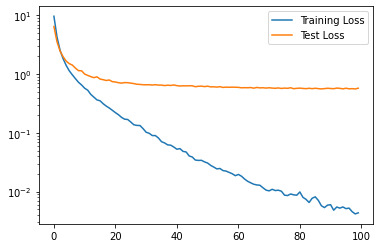

In [10]:
import matplotlib.pyplot as plt
plt.semilogy(h.history['loss'])
plt.semilogy(h.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])

The next code block shows a simple grid search method for hyperparameter optimization. It utilizes the scikit learn wrapper from keras. It can be slow, but is a helpful tool to test different network structures for the same learning task.

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(activations='tanh',inter_layer_size=100):
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=64, activation=activations))
    model.add(Dense(100,activation=activations))
    model.add(Dense(1))
    # Compile model
    
    model.compile(loss='MSE', optimizer='Adam')
    return model

# create model
model = KerasRegressor(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
epochs = [500,1000]
activations=['relu', 'tanh']

param_grid = dict( epochs=epochs, activations=activations)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best model found using" + str(grid_result.best_params_))

Using TensorFlow backend.


KeyboardInterrupt: 

### Objective 4: Formulating Same Problem as a Classification Task

In [13]:
NN_Class= tf.keras.Sequential()

NN_Class.add(tf.keras.layers.Dense(100,input_dim=64,activation="tanh"))
NN_Class.add(tf.keras.layers.Dense(100,activation="tanh"))
#Output is now 10 "classes", digits 0-9
NN_Class.add(tf.keras.layers.Dense(10))
#SparseCategoricalCrossEntropy is common Classification Loss Fxn
NN_Class.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='Adam')
h=NN_Class.fit(X_train,y_train,epochs=500,batch_size=48,validation_data = (X_test, y_test))

Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 1.5332 - val_loss: 0.7876
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5370 - val_loss: 0.3322
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2861 - val_loss: 0.2185
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1883 - val_loss: 0.1678
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1383 - val_loss: 0.1343
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1050 - val_loss: 0.1121
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0833 - val_loss: 0.1003
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0668 - val_loss: 0.0868
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0798
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0449 - val_loss: 0.0760
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 4.5670e-04 - val_loss: 0.0334
Epoch 83/500
32/32 [==============================] - 0s 2ms/step - loss: 4.4319e-04 - val_loss: 0.0333
Epoch 84/500
32/32 [==============================] - 0s 2ms/step - loss: 4.3239e-04 - val_loss: 0.0328
Epoch 85/500
32/32 [==============================] - 0s 2ms/step - loss: 4.1954e-04 - val_loss: 0.0328
Epoch 86/500
32/32 [==============================] - 0s 2ms/step - loss: 4.1054e-04 - val_loss: 0.0328
Epoch 87/500
32/32 [==============================] - 0s 2ms/step - loss: 3.9789e-04 - val_loss: 0.0326
Epoch 88/500
32/32 [==============================] - 0s 2ms/step - loss: 3.8767e-04 - val_loss: 0.0329
Epoch 89/500
32/32 [==============================] - 0s 2ms/step - loss: 3.7786e-04 - val_loss: 0.0329
Epoch 90/500
32/32 [==============================] - 0s 2ms/step - loss: 3.6816e-04 - val_loss: 0.0332
Epoch 91/500
32/32 [==============================] - 0s 2ms/step - loss: 3.5

32/32 [==============================] - 0s 2ms/step - loss: 1.7591e-05 - val_loss: 0.0286
Epoch 239/500
32/32 [==============================] - 0s 2ms/step - loss: 1.7268e-05 - val_loss: 0.0291
Epoch 240/500
32/32 [==============================] - 0s 2ms/step - loss: 1.6958e-05 - val_loss: 0.0287
Epoch 241/500
32/32 [==============================] - 0s 2ms/step - loss: 1.6706e-05 - val_loss: 0.0286
Epoch 242/500
32/32 [==============================] - 0s 2ms/step - loss: 1.6405e-05 - val_loss: 0.0291
Epoch 243/500
32/32 [==============================] - 0s 2ms/step - loss: 1.6093e-05 - val_loss: 0.0284
Epoch 244/500
32/32 [==============================] - 0s 2ms/step - loss: 1.5820e-05 - val_loss: 0.0285
Epoch 245/500
32/32 [==============================] - 0s 2ms/step - loss: 1.5534e-05 - val_loss: 0.0291
Epoch 246/500
32/32 [==============================] - 0s 2ms/step - loss: 1.5252e-05 - val_loss: 0.0285
Epoch 247/500
32/32 [==============================] - 0s 2ms/step - 

32/32 [==============================] - 0s 1ms/step - loss: 1.1920e-06 - val_loss: 0.0277
Epoch 395/500
32/32 [==============================] - 0s 2ms/step - loss: 1.1719e-06 - val_loss: 0.0279
Epoch 396/500
32/32 [==============================] - 0s 1ms/step - loss: 1.1534e-06 - val_loss: 0.0280
Epoch 397/500
32/32 [==============================] - 0s 1ms/step - loss: 1.1323e-06 - val_loss: 0.0279
Epoch 398/500
32/32 [==============================] - 0s 2ms/step - loss: 1.1125e-06 - val_loss: 0.0279
Epoch 399/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0935e-06 - val_loss: 0.0279
Epoch 400/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0754e-06 - val_loss: 0.0279
Epoch 401/500
32/32 [==============================] - 0s 2ms/step - loss: 1.0599e-06 - val_loss: 0.0272
Epoch 402/500
32/32 [==============================] - 0s 1ms/step - loss: 1.0399e-06 - val_loss: 0.0277
Epoch 403/500
32/32 [==============================] - 0s 1ms/step - 

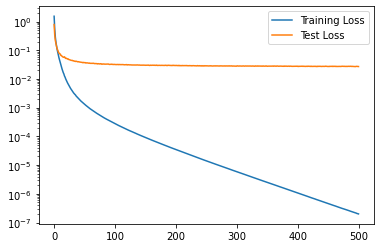

In [14]:
plt.semilogy(h.history['loss'])
plt.semilogy(h.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])

After fitting/hyperparameter optimization, we may want to save our model.

In [ ]:
model.save('path/to/location')

model = keras.models.load_model('path/to/location')

## Hybrid Modeling: Incorporating ML Models into Pyomo

In [16]:
#Generation of Data and Training of Neural Network
import numpy as np
#using random sampling scheme, can use LHS or other methods 
xvalues=np.random.random(3000) 
yvalues=np.random.random(3000)
XYvalues=np.concatenate((xvalues.reshape(-1,1),yvalues.reshape(-1,1)),axis=1)
zvalues=np.sin(xvalues)*np.sin(yvalues)
N_nodes=10
import tensorflow as tf
NNmodel=tf.keras.models.Sequential()
NNmodel.add(tf.keras.layers.Dense(N_nodes,input_dim=2,activation="tanh"))
NNmodel.add(tf.keras.layers.Dense(N_nodes,activation="tanh"))
NNmodel.add(tf.keras.layers.Dense(1))
NNmodel.compile(loss='MSE',optimizer='Adam')
NNmodel.fit(XYvalues,zvalues,epochs=500)


# %%
from pyomo.environ import *
import time

start = time.time()


model = ConcreteModel() 
model.x = Var(initialize=-1.2,bounds=(-2,2))
model.y = Var(initialize=1,bounds=(-2,2))
def rosenbrock(m):
    return (1.0-m.x)**2 + 100.0*(m.y - m.x**2)**2

def full_const(m):
    return sin(m.y)*sin(m.x)<=0.6


def neural_net_constraint_2_layer(m):
    weights = NNmodel.layers[0].get_weights()[0]
    biases = NNmodel.layers[0].get_weights()[1]
    inter=[]
    for i in range(N_nodes):
        inter.append(tanh(m.x * weights[0][i] + m.y* weights[1][i]+biases[i]))
    weights = NNmodel.layers[1].get_weights()[0]
    biases = NNmodel.layers[1].get_weights()[1]  
    output=[]
    for j in range(N_nodes):
        output.append(tanh(inter[0]*weights[0][j]+inter[1]*weights[1][j]+
                           inter[2]*weights[2][j]+inter[3]*weights[3][j]+
                           inter[4]*weights[4][j]+inter[5]*weights[5][j]+
                           inter[6]*weights[6][j]+inter[7]*weights[7][j]+
                           inter[8]*weights[8][j]+inter[9]*weights[9][j]+biases[j]))
    weights = NNmodel.layers[2].get_weights()[0]
    biases = NNmodel.layers[2].get_weights()[1]  
    output1=[]
    for k in range(N_nodes):
        output1.append(output[k]*weights[k][0])
    output1=sum(output1)+biases[0]
    return output1<=0.6


def neural_net_constraint_1_layer(m):
    weights = NNmodel.layers[0].get_weights()[0]
    biases = NNmodel.layers[0].get_weights()[1]
    inter=[]
    for i in range(N_nodes):
        inter.append(tanh(m.x * weights[0][i] + m.y * weights[1][i]+biases[i]))
    weights = NNmodel.layers[1].get_weights()[0]
    biases = NNmodel.layers[1].get_weights()[1]  
    output=[]
    for j in range(N_nodes):
        output.append(inter[j]*weights[j][0])
    output=sum(output)+biases[0]
##    return sum(tanh(m.x * weights[0][i] + m.y * weights[1][i]+biases[i]) for i in range(100))>=2
    return output<=0.8
#model.NN_const = Constraint(expr=neural_net_constraint_1_layer(model))
#model.NN_const = Constraint(expr=neural_net_constraint_2_layer(model))
model.real_const = Constraint(expr=full_const(model))

model.obj = Objective(rule=rosenbrock, sense=minimize)
solver = SolverFactory('ipopt') 
solver.options['mu_init'] = 1e-4 
solver.options['print_user_options'] = 'yes' 
solver.options['ma27_pivtol'] = 1e-4 
solver.solve(model, tee=True)
print()
print('*** Solution *** :') 
print('x:', value(model.x)) 
print('y:', value(model.y))

end = time.time()
print(end-start)



Epoch 1/500
94/94 [==============================] - 0s 763us/step - loss: 0.0094
Epoch 2/500
94/94 [==============================] - 0s 724us/step - loss: 0.0032
Epoch 3/500
94/94 [==============================] - 0s 717us/step - loss: 0.0028
Epoch 4/500
94/94 [==============================] - 0s 687us/step - loss: 0.0023
Epoch 5/500
94/94 [==============================] - 0s 683us/step - loss: 0.0019
Epoch 6/500
94/94 [==============================] - 0s 688us/step - loss: 0.0015
Epoch 7/500
94/94 [==============================] - 0s 713us/step - loss: 0.0013
Epoch 8/500
94/94 [==============================] - 0s 709us/step - loss: 0.0012
Epoch 9/500
94/94 [==============================] - 0s 668us/step - loss: 0.0011
Epoch 10/500
94/94 [==============================] - 0s 683us/step - loss: 0.0010
Epoch 11/500
94/94 [==============================] - 0s 702us/step - loss: 0.0010
Epoch 12/500
94/94 [==============================] - 0s 707us/step - loss: 9.5344e-04
Epoch 13/

94/94 [==============================] - 0s 598us/step - loss: 3.0514e-06
Epoch 189/500
94/94 [==============================] - 0s 651us/step - loss: 3.3743e-06
Epoch 190/500
94/94 [==============================] - 0s 613us/step - loss: 2.4731e-06
Epoch 191/500
94/94 [==============================] - 0s 614us/step - loss: 2.2822e-06
Epoch 192/500
94/94 [==============================] - 0s 589us/step - loss: 2.5727e-06
Epoch 193/500
94/94 [==============================] - 0s 600us/step - loss: 2.8406e-06
Epoch 194/500
94/94 [==============================] - 0s 599us/step - loss: 1.9615e-06
Epoch 195/500
94/94 [==============================] - 0s 611us/step - loss: 2.7333e-06
Epoch 196/500
94/94 [==============================] - 0s 598us/step - loss: 3.1206e-06
Epoch 197/500
94/94 [==============================] - 0s 616us/step - loss: 2.8022e-06
Epoch 198/500
94/94 [==============================] - 0s 645us/step - loss: 2.0132e-06
Epoch 199/500
94/94 [=========================

94/94 [==============================] - 0s 627us/step - loss: 1.4728e-06
Epoch 375/500
94/94 [==============================] - 0s 660us/step - loss: 1.8444e-06
Epoch 376/500
94/94 [==============================] - 0s 634us/step - loss: 1.2723e-06
Epoch 377/500
94/94 [==============================] - 0s 616us/step - loss: 2.3207e-06
Epoch 378/500
94/94 [==============================] - 0s 662us/step - loss: 1.9367e-06
Epoch 379/500
94/94 [==============================] - 0s 634us/step - loss: 1.6276e-06
Epoch 380/500
94/94 [==============================] - 0s 600us/step - loss: 1.3879e-06
Epoch 381/500
94/94 [==============================] - 0s 588us/step - loss: 1.3166e-06
Epoch 382/500
94/94 [==============================] - 0s 595us/step - loss: 1.8104e-06
Epoch 383/500
94/94 [==============================] - 0s 582us/step - loss: 1.0204e-06
Epoch 384/500
94/94 [==============================] - 0s 589us/step - loss: 1.4805e-06
Epoch 385/500
94/94 [=========================

In [20]:
from pyomo.environ import *
import time
start = time.time()

model = ConcreteModel() 
model.x = Var(initialize=-1.2,bounds=(-2,2))
model.y = Var(initialize=1,bounds=(-2,2))
def rosenbrock(m):
    return (1.0-m.x)**2 + 100.0*(m.y - m.x**2)**2
def full_const(m):
    return sin(m.y)*sin(m.x)<=0.6
model.NN_const = Constraint(expr=neural_net_constraint_2_layer(model))
model.obj = Objective(rule=rosenbrock, sense=minimize)
solver = SolverFactory('ipopt') 
solver.options['mu_init'] = 1e-4 
solver.options['ma27_pivtol'] = 1e-4 
solver.solve(model, tee=True)
print()
print('*** Solution *** :') 
print('x:', value(model.x)) 
print('y:', value(model.y))

end = time.time()
print("time to solve problem: "+str(end-start)+" sec")

Ipopt 3.12.12: mu_init=0.0001
ma27_pivtol=0.0001


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables wi

In [21]:
start = time.time()

model = ConcreteModel() 
model.x = Var(initialize=-1.2,bounds=(-2,2))
model.y = Var(initialize=1,bounds=(-2,2))
def rosenbrock(m):
    return (1.0-m.x)**2 + 100.0*(m.y - m.x**2)**2
def full_const(m):
    return sin(m.y)*sin(m.x)<=0.6
model.real_const = Constraint(expr=full_const(model))
model.obj = Objective(rule=rosenbrock, sense=minimize)
solver = SolverFactory('ipopt') 
solver.options['mu_init'] = 1e-4 
solver.options['ma27_pivtol'] = 1e-4 
solver.solve(model, tee=True)
print()
print('*** Solution *** :') 
print('x:', value(model.x)) 
print('y:', value(model.y))

end = time.time()
print("time to solve problem: "+str(end-start)+" sec")

Ipopt 3.12.12: mu_init=0.0001
ma27_pivtol=0.0001


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables wi

## Introduction to Physics-Informed Neural Networks (PINNs)

I will introduce the theory/equations necessary for PINNs here before code.

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import sciann as sn

---------------------- SCIANN 0.5.5.0 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 



## PINNs Using SciANN- PDE Example

In [ ]:
pip install sciann

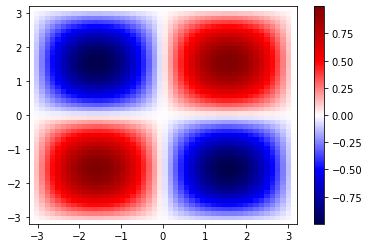

In [37]:
#We are going to generate data for unknown fxn f
x_data, y_data = np.meshgrid(
    np.linspace(-np.pi, np.pi, 50), 
    np.linspace(-np.pi, np.pi, 50)
)
f_data = np.sin(x_data) * np.sin(y_data)
plt.pcolor(x_data, y_data, f_data, cmap='seismic', shading='auto')
plt.colorbar()

### SciANN Modeling Basics

In [ ]:
from sciann import Variable, Functional, SciModel
from sciann.constraints import Data

#similar to pyomo, we declare our variables, constraints
# SciANN components
# Variable = ML model inputs
# Functional = ML mapping of inputs to outputs
# SciModel = creates keras model from variable, functionals
# Data constraint = used when fitting model to data set
x = Variable('x')
y = Functional('y')
model = SciModel(x, Data(y))
# model.train method uses keras, 
# so all options learned in previous lesson can be used
model.train(x_true, y_true, epochs=5, batch_size=32)

In [25]:
import sciann as sn

### Normal Neural Net

In [38]:
#similar to pyomo, we declare our variables
x = sn.Variable('x')
y = sn.Variable('y')
#Functionals can be used to easily create ML models
# Here f is our model output, x and y are inputs
# The model has 4 hidden layers with 10 nodes each
# The activation fxn for all nodes is tanh
f = sn.Functional('f', [x, y], [10, 10, 10, 10], 'tanh')

In [39]:
# Since we are fitting to data, we use Data constraint
d1 = sn.Data(f)
# Our Neural Network model is created
m = sn.SciModel([x, y], d1)


Epoch 00433: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.


Text(0, 0.5, 'Training Loss')

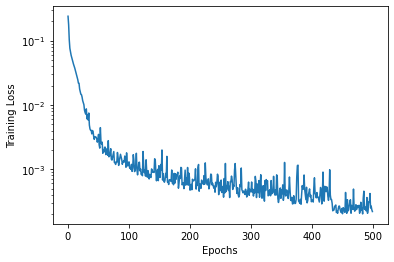

In [40]:
# Now we can train our plain NN to the data-set
h = m.train([x_data, y_data], f_data, learning_rate=0.002, epochs=500, verbose=0)
plt.semilogy(h.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

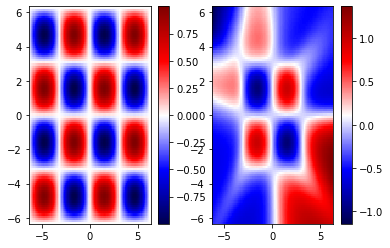

In [35]:
x_test, y_test = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 100), np.linspace(-2*np.pi, 2*np.pi, 100))
f_test = np.sin(x_test) * np.sin(y_test)

f_pred = f.eval([x_test, y_test])

fig, ax = plt.subplots(1, 2)

im = ax[0].pcolor(x_test, y_test, f_test, cmap='seismic',shading='auto')
plt.colorbar(im, ax=ax[0])
#plt.xlabel('X')
#plt.ylabel('Y')
im = ax[1].pcolor(x_test, y_test, f_pred, cmap='seismic',shading='auto')
plt.colorbar(im, ax=ax[1])

### PINN

In [46]:
x = sn.Variable('x')
y = sn.Variable('y')
f = sn.Functional('f', [x, y], [10, 10, 10, 10], 'tanh')

In [47]:
#Diff function computes derivatives via automatic differentiation
#we want f_xx and f_yy, second order derivatives
f_xx = sn.math.diff(f, x, order=2)
f_yy = sn.math.diff(f, y, order=2)
# Full PDE is described below
L = f_xx + f_yy + 2*f

Text(0, 0.5, 'Training Loss')

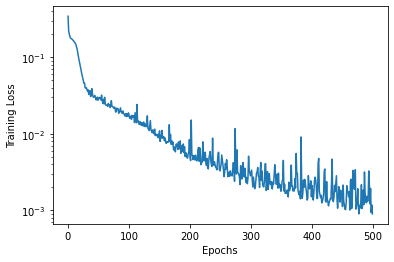

In [48]:
d1 = sn.Data(f)
d2 = sn.Data(L)
#Now were fitting our model to 2 model outputs
# Data fit (d1) and PDE fit (d2)
m1 = sn.SciModel([x, y], [d1, d2])
# Can use 'zero' keyword since PDE fxn = 0 @ all x,y
h = m1.train([x_data, y_data], [f_data, 'zero'], learning_rate=0.002, epochs=500, verbose=0)
plt.semilogy(h.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

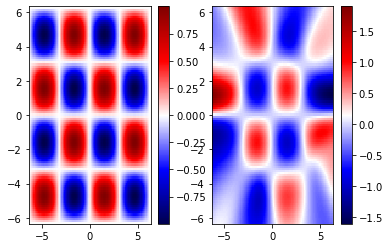

In [49]:
x_test, y_test = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 100), np.linspace(-2*np.pi, 2*np.pi, 100))
f_test = np.sin(x_test) * np.sin(y_test)

f_pred = f.eval([x_test, y_test])

fig, ax = plt.subplots(1, 2)

im = ax[0].pcolor(x_test, y_test, f_test, cmap='seismic',shading='auto')
plt.colorbar(im, ax=ax[0])
#plt.xlabel('X')
#plt.ylabel('Y')
im = ax[1].pcolor(x_test, y_test, f_pred, cmap='seismic',shading='auto')
plt.colorbar(im, ax=ax[1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the

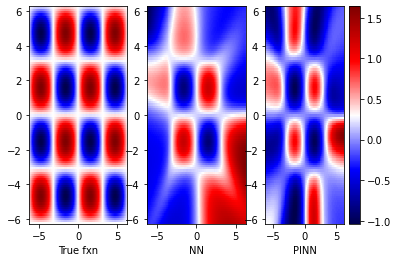

In [44]:
x_test, y_test = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 100), np.linspace(-2*np.pi, 2*np.pi, 100))
f_test = np.sin(x_test) * np.sin(y_test)

f_pred_NN = f.eval([x_test, y_test])

fig, ax = plt.subplots(1, 3)

im = ax[0].pcolor(x_test, y_test, f_test, cmap='seismic',shading='auto')
ax[0].set_xlabel('True fxn')
ax[1].set_xlabel('NN')
ax[2].set_xlabel('PINN')

im = ax[1].pcolor(x_test, y_test, f_pred, cmap='seismic',shading='auto')

im = ax[2].pcolor(x_test, y_test, f_pred_NN, cmap='seismic',shading='auto')
plt.colorbar(im, ax=ax[2])
plt.savefig("Extrap")